# Lab 1. Binaryzacja i wpływ modelu barw

## Wstęp
Poprzez binaryzację obrazu można rozumieć redukcję dynamiki piksela do wartości binarnej (tylko dwóch możliwych wartości). Nie ma tutaj znaczenia sama reprezentacja - czy jest to `0` i `1`, czy `0` i `255` - ważne, że mamy do czynienia z dwiema wartościami reprezentującymi dynamikę piksela. Najprostszą postacią binaryzacji jest konwesja dynamiki piksela dokładnie w połowie zakresu danych. I tak na przykład dla dynamiki piksela 8bit (256 poziomów) takim progiem będzie `127`. Poniższy przykład pokazuje jak dokonać takiej binaryzacji w środowisku python

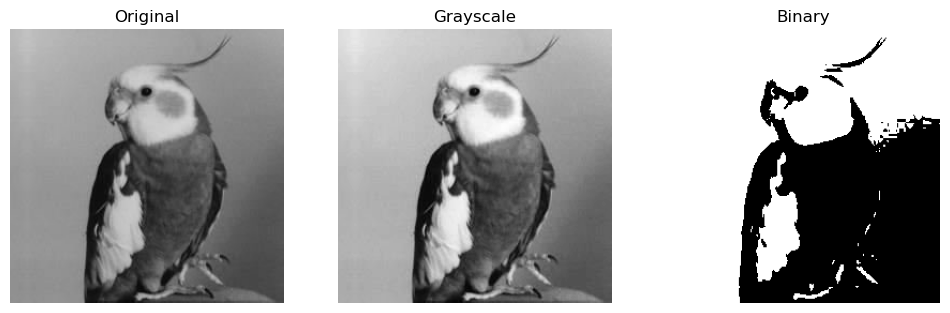

In [8]:
import cv2 as cv
import matplotlib.pyplot as plt

# Uwaga: OpenCV czyta kolorowe obrazy jako BGR, a nie RGB
imgColor = cv.imread('../images/papuga.jpg')

# Konwersja do skali szarości
imgGray = cv.cvtColor(imgColor, cv.COLOR_BGR2GRAY)

# Binaryzacja z manualnie ustawionym progiem
threshold = 127
imgBinary = imgGray > threshold

plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.title('Original')
# Przed wyświetleniem konwertujemy z BGR do RGB, gdyż matplotlib zakłada taką kolejność kanałów
plt.imshow(cv.cvtColor(imgColor, cv.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title('Grayscale')
plt.imshow(imgGray, cmap=plt.cm.gray)
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title('Binary')
plt.imshow(imgBinary, cmap=plt.cm.gray)
plt.axis('off')

plt.show()


> **Uwaga:** zmienne zadeklarowane w komórce kodu powyżej nie znikają (są dostępne w kolejnych komórkach) - proszę na to zwrócić uwagę, aby nie pojawiły się błędy z używaniem już istniejących danych - może być to pożądane, ale nie zawsze.

Poniższe zadania będą wariacją podstawowej motedy binaryzacji - różnice polegać będą głównie na sposobie doboru progu binaryzacji, lub wielkości "okna" - dla jak dużego obszaru dana wartość progu binaryzacji będzie wyliczona i zastosowana (progowanie globalne vs adaptacyjne).

### Zadanie 1
Dokonać binaryzacji obrazu kolorowego po uprzedniej jego konwersji do skali szarości. W celu konwersji do skali szarości możliwe jest wykorzystanie funkcji `cv.cvtColor` z parametrem `COLOR_BGR2GRAY` (patrz wstęp). Binaryzacja metodą Otsu może być wykonana za pomocą polecenia `cv.threshold` ([Dokumentacja](https://docs.opencv.org/4.6.0/d7/d1b/group__imgproc__misc.html#gae8a4a146d1ca78c626a53577199e9c57)).

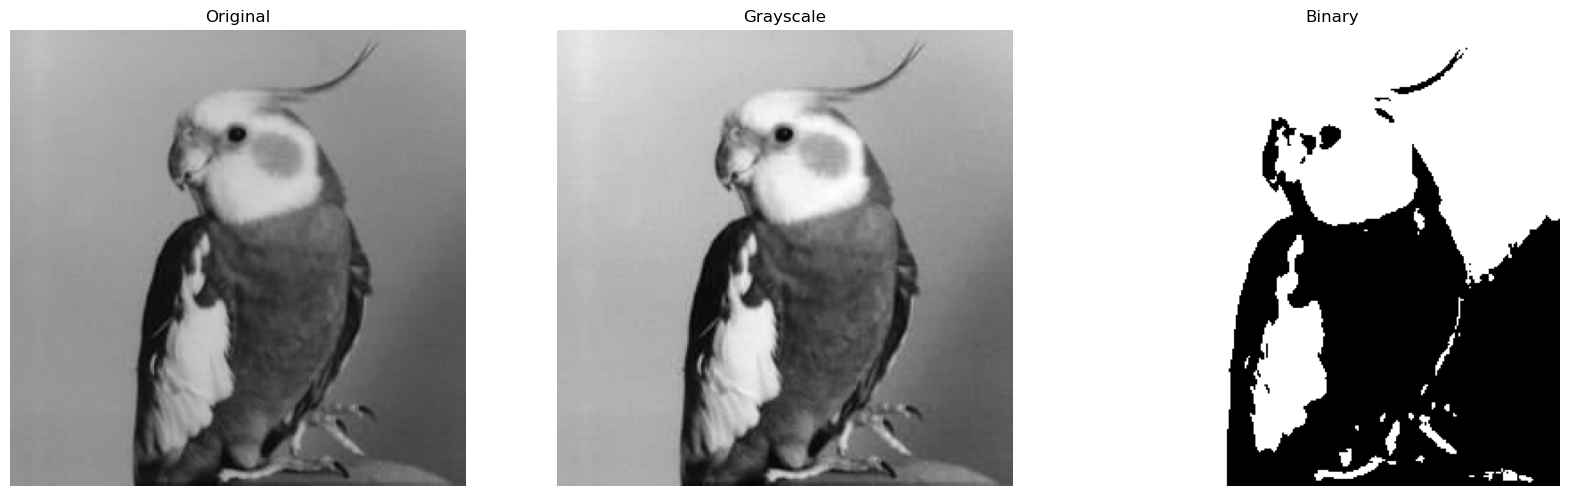

In [9]:
import cv2 as cv
import matplotlib.pyplot as plt

# Load the color image
img_color = cv.imread('../images/papuga.jpg')

# Convert the image to grayscale
img_gray = cv.cvtColor(img_color, cv.COLOR_BGR2GRAY)

# Perform Otsu's thresholding
# _, is returned value from cv.treshold wich we dont need
_, img_binary = cv.threshold(img_gray, 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)

# Plotting the images
plt.figure(figsize=(20, 10))

# Original Image
plt.subplot(1, 3, 1)
plt.title('Original')
plt.imshow(cv.cvtColor(img_color, cv.COLOR_BGR2RGB))  # Convert BGR to RGB for correct color display
plt.axis('off')

# Grayscale Image
plt.subplot(1, 3, 2)
plt.title('Grayscale')
plt.imshow(img_gray, cmap = plt.cm.gray)
plt.axis('off')

# Binary Image
plt.subplot(1, 3, 3)
plt.title('Binary')
plt.imshow(img_binary, cmap = plt.cm.gray)
plt.axis('off')

# Show the plots
plt.show()


### Zadanie 2
Zbadać wpływ sposobu konwersji obrazu kolorowego do skali szarości na wynik binaryzacji metodą Otsu wybierając odpowiednią składową reprezentującą jasność z modeli CIE `XYZ`, CIE `Lab`, `HLS` oraz `HSV` uzyskanych za pomocą funkcji `cv.cvtColor` ([Kody konwersji barw](https://docs.opencv.org/4.6.0/d8/d01/group__imgproc__color__conversions.html#ga4e0972be5de079fed4e3a10e24ef5ef0)).

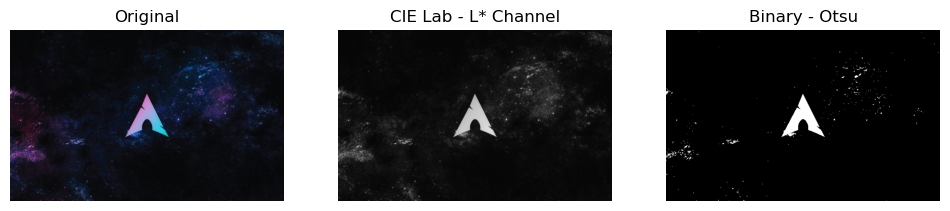

In [2]:
import cv2 as cv
import matplotlib.pyplot as plt

# Wczytanie obrazu kolorowego
imgColor = cv.imread('../images/arch.jpg')

# Konwersja obrazu do przestrzeni barw CIE Lab
imgLab = cv.cvtColor(imgColor, cv.COLOR_BGR2Lab)

# Wydobycie składowej jasności (L*) z obrazu w przestrzeni CIE Lab
imgL = imgLab[:, :, 0]  # Pierwszy kanał to L*

# Binaryzacja metodą Otsu
_, imgBinaryOtsu = cv.threshold(imgL, 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)

# Wyświetlenie wyników
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.title('Original')
plt.imshow(cv.cvtColor(imgColor, cv.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title('CIE Lab - L* Channel')
plt.imshow(imgL, cmap=plt.cm.gray)
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title('Binary - Otsu')
plt.imshow(imgBinaryOtsu, cmap=plt.cm.gray)
plt.axis('off')

plt.show()


### Zadanie 3
Powtórzyć eksperymenty dla progowania adaptacyjnego z użyciem funkcji `cv.adaptiveThreshold` ([Dokumentacja online](https://docs.opencv.org/4.6.0/d7/d1b/group__imgproc__misc.html#ga72b913f352e4a1b1b397736707afcde3)) z paramaterami `Mean` oraz `Gaussian` ([Opis parametrów](https://docs.opencv.org/4.6.0/d7/d1b/group__imgproc__misc.html#gaa42a3e6ef26247da787bf34030ed772c)) określającymi wybór metody progowania adaptacyjnego.

### Zadanie 4
Wykonać binaryzację obrazu zaszumionego (funkcję zaszumienia trzeba napisać samodzielnie) i porównać uzyskane wyniki.

### Zadanie 5
Wykorzystać dostępne implementacje innych metod binaryzacji (`Sauvola`, `Niblack`) i porównać uzyskane wyniki z metodą `Otsu` ([Dokumentacja w scikit image](https://scikit-image.org/docs/stable/auto_examples/segmentation/plot_niblack_sauvola.html)).